In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline



In [2]:
df = pd.read_csv('D:\jupyter\projects\data\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

#### Describe the numerical data ?

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


#### What are the unique values are in each categorical column (alphabets)?

In [5]:
def unique(df,a,b,c,d,e,f):
        print(df[a].unique())
        print(df[b].unique())
        print(df[c].unique())
        print(df[d].unique())
        print(df[e].unique())
        print(df[f].unique())
        
        
unique(df,'gender','ever_married','work_type','Residence_type','smoking_status','stroke')
    
    

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


### Q: How many missing values are there in each column ?

In [8]:
# can also check with 
# df.isna().sum

In [6]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


#### Fill missing bmi values

In [7]:
median_bmi = df["bmi"].median()

df['bmi'].fillna(median_bmi, inplace=True)

### Q: How many positive values of stroke are there ?

In [8]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

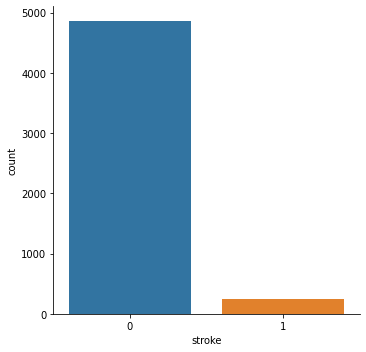

In [9]:
sns.catplot(
    data=df,
    x="stroke",
    kind="count",
    margin_titles=True

)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Histograms from HO book

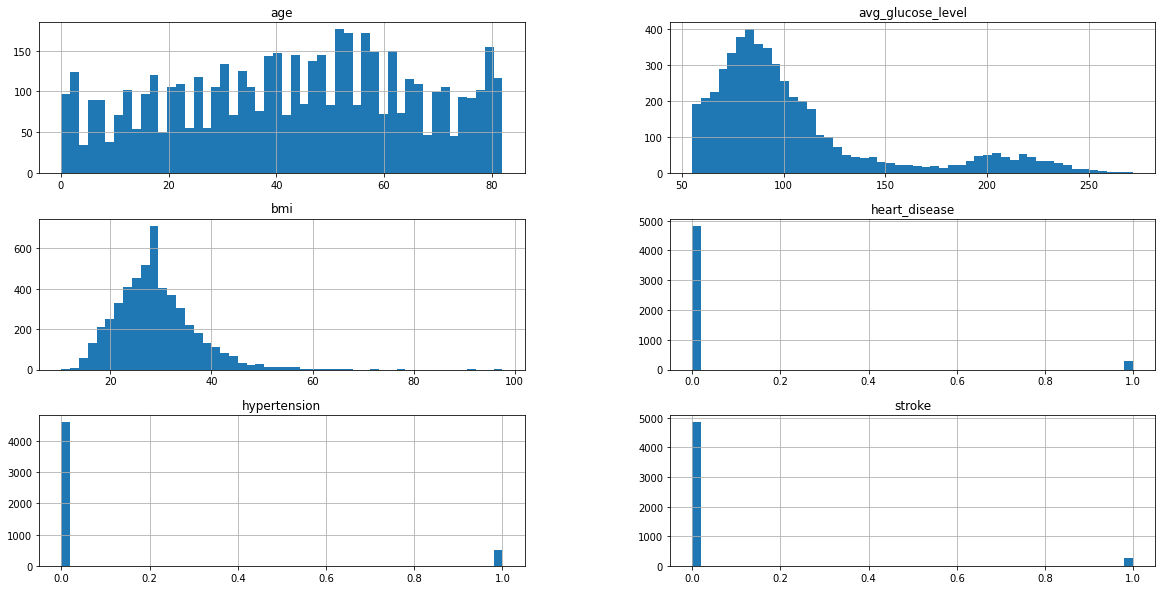

In [11]:
# histograms of stroke = True

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
#save_fig("attribute_histogram_plots")
plt.show()

--- 

## Previously I converted all numerical values into categories, now trying without it to make things simple

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,2
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,2


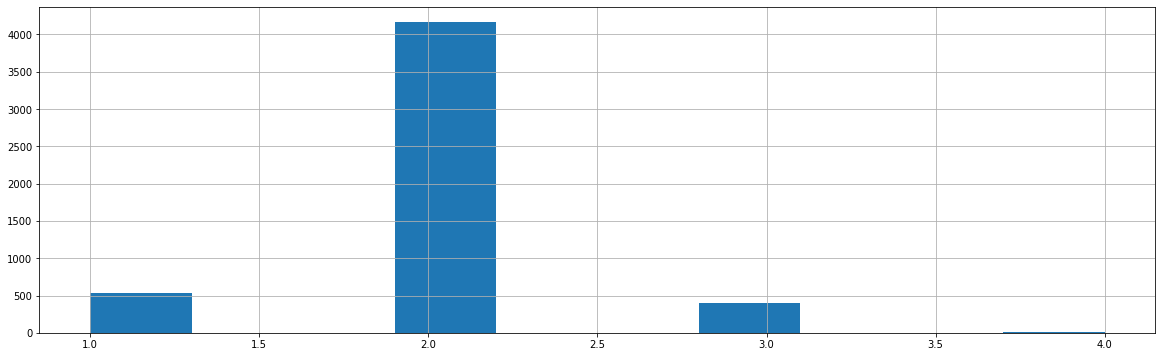

In [13]:
df["bmi_cat"] = pd.cut(df["bmi"],
                               bins=[0 , 20, 40, 60, np.inf],
                               labels=[1, 2, 3, 4])

df["bmi_cat"].hist(figsize=(20,6))
df.drop('bmi', axis=1, inplace=True)
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_cat,age_cat
0,Male,0,1,Yes,Private,Urban,228.69,formerly smoked,1,2,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,2,4
2,Male,0,1,Yes,Private,Rural,105.92,never smoked,1,2,4
3,Female,0,0,Yes,Private,Urban,171.23,smokes,1,2,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,2,4


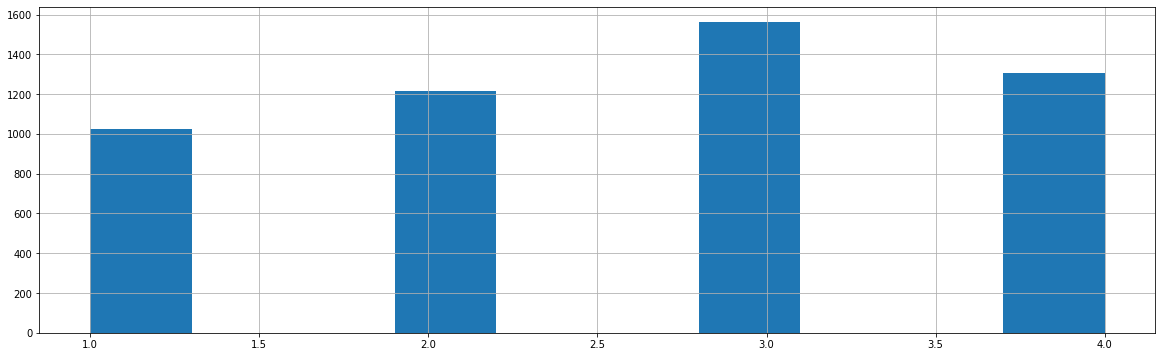

In [14]:
df["age_cat"] = pd.cut(df["age"],
                               bins=[0 , 20, 40, 60, np.inf],
                               labels=[1, 2, 3, 4])

df["age_cat"].hist(figsize=(20,6))
df.drop('age', axis=1, inplace=True)
df.head()

<AxesSubplot:>

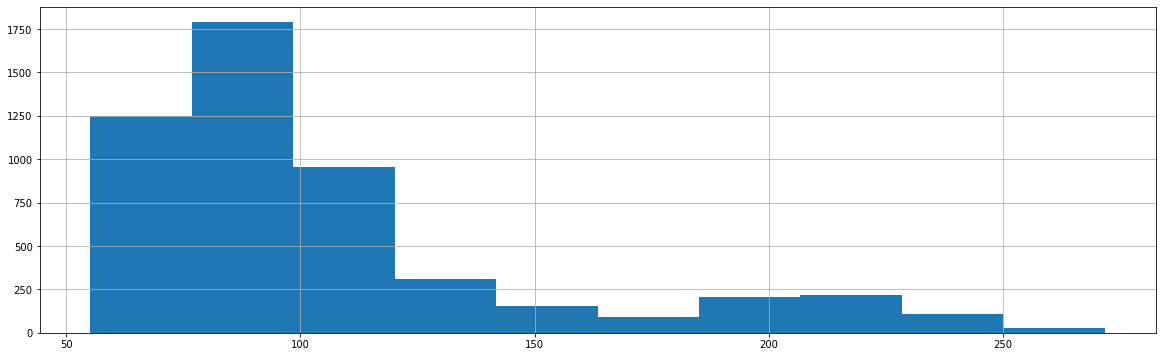

In [15]:
df["avg_glucose_level"].hist(figsize=(20,6))

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,2,4,4
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,2,4,4
2,Male,0,1,Yes,Private,Rural,never smoked,1,2,4,2
3,Female,0,0,Yes,Private,Urban,smokes,1,2,3,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,2,4,3


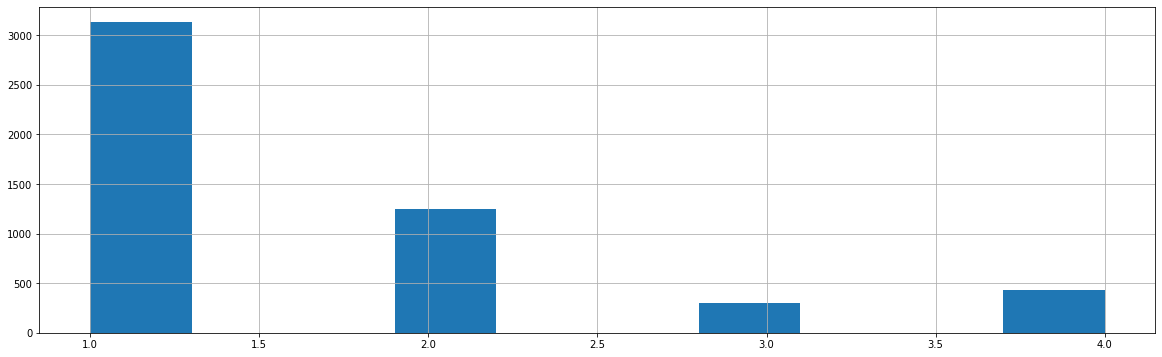

In [16]:
df["glucose_cat"] = pd.cut(df["avg_glucose_level"],
                               bins=[50 , 100, 150, 200, np.inf],
                               labels=[1, 2, 3, 4])

df["glucose_cat"].hist(figsize=(20,6))
df.drop('avg_glucose_level', axis=1, inplace=True)
df.head()

---

### Define the X and y so that the X are the Features and y is the targets

In [17]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,2,4,4
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,2,4,4
2,Male,0,1,Yes,Private,Rural,never smoked,1,2,4,2
3,Female,0,0,Yes,Private,Urban,smokes,1,2,3,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,2,4,3


In [18]:
X = df.drop('stroke', axis=1)
X.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi_cat,age_cat,glucose_cat
0,Male,0,1,Yes,Private,Urban,formerly smoked,2,4,4
1,Female,0,0,Yes,Self-employed,Rural,never smoked,2,4,4
2,Male,0,1,Yes,Private,Rural,never smoked,2,4,2
3,Female,0,0,Yes,Private,Urban,smokes,2,3,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,2,4,3


In [19]:
y = df['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

### Splitting the data into Testing, Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
X_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi_cat,age_cat,glucose_cat
845,Female,0,0,Yes,Private,Urban,never smoked,2,3,1
3744,Female,0,0,No,Private,Urban,never smoked,2,2,1
4183,Female,0,0,Yes,Private,Rural,never smoked,2,2,2
3409,Male,0,0,Yes,Private,Rural,never smoked,2,2,2
284,Male,0,0,No,Govt_job,Urban,Unknown,2,1,1


### Upscaling Data

In [24]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [25]:
os =  RandomOverSampler(sampling_strategy=1)

In [26]:
X_train_result, y_train_result = os.fit_sample(X_train, y_train)

giving value to X_train again

In [27]:
X_train = X_train_result
y_train = y_train_result

In [28]:
X_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi_cat,age_cat,glucose_cat
0,Female,0,0,Yes,Private,Urban,never smoked,2,3,1
1,Female,0,0,No,Private,Urban,never smoked,2,2,1
2,Female,0,0,Yes,Private,Rural,never smoked,2,2,2
3,Male,0,0,Yes,Private,Rural,never smoked,2,2,2
4,Male,0,0,No,Govt_job,Urban,Unknown,2,1,1


In [29]:
y_train.value_counts()

1    3888
0    3888
Name: stroke, dtype: int64

### One Hot Encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
column_trans = make_column_transformer(
    (OneHotEncoder(),['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_cat', 'age_cat', 'glucose_cat']),
    remainder='passthrough')

### Model 1 : Logistic Regression Pipeline

In [42]:
logreg = LogisticRegression()

In [104]:
steps_logreg = [('Column_Transformation', column_trans),
                #('scaler', StandardScaler(with_mean=True)),
         ('logistic_regression', logreg)]

pipeline_logreg = Pipeline(steps_logreg)

parameters = {
    'logistic_regression__max_iter': [1000, 2000, 3000],
    'logistic_regression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logistic_regression__C': [100, 10, 1.0]             
             }

cv_logreg = GridSearchCV(pipeline_logreg, param_grid=parameters, cv=5)

In [105]:
cv_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Column_Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status',
                           

In [106]:
print(cv_logreg.best_params_)

{'logistic_regression__C': 10, 'logistic_regression__max_iter': 1000, 'logistic_regression__solver': 'newton-cg'}


In [107]:
y_pred_logreg = cv_logreg.predict(X_test)

### Logistic Regression Classification report

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.11      0.82      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.75      0.50      1022
weighted avg       0.94      0.68      0.77      1022



### Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logreg)
cm

array([[655, 317],
       [  9,  41]], dtype=int64)

Text(69.0, 0.5, 'Actual')

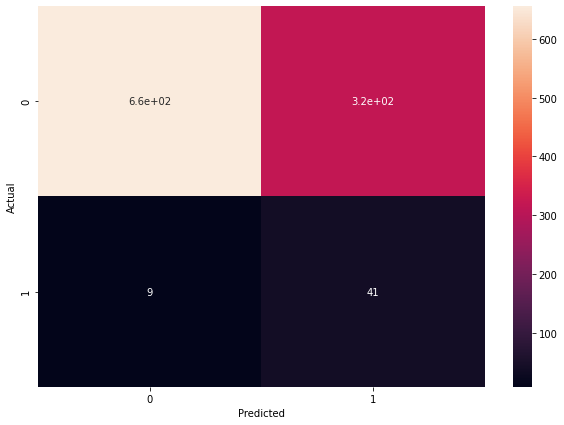

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### AUC Score

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [113]:
roc_auc_score(y_test,y_pred_logreg)

0.7469341563786007

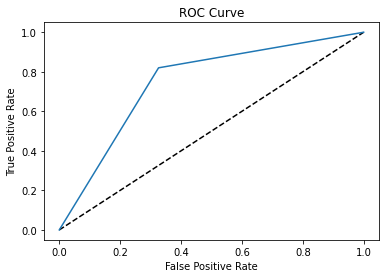

In [114]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
#y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 2 : Random Forest Pipeline

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier()

In [ ]:
steps_rf = [('Column_Transformation', column_trans),
                #('scaler', StandardScaler(with_mean=True)),
         ('random_forest', rf)]

pipeline_rf = Pipeline(steps_rf)

parameters = {
    #'random_forest__bootstrap': [True, False],
    #'random_forest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'random_forest__max_features': [1, 5, 10],
    #'random_forest__min_samples_leaf': [1, 2, 4],
    #'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__n_estimators': [200, 400, 600]
    
             }

cv_rf = GridSearchCV(pipeline_rf, param_grid=parameters, cv=5)

In [121]:
cv_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Column_Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status',
                           

In [92]:
print(cv_rf.best_params_)

{'random_forest__n_estimators': 400}


In [93]:
y_pred_rf = cv_rf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       972
           1       0.07      0.24      0.11        50

    accuracy                           0.81      1022
   macro avg       0.51      0.54      0.50      1022
weighted avg       0.91      0.81      0.85      1022



### RF Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[812, 160],
       [ 38,  12]], dtype=int64)

Text(69.0, 0.5, 'Actual')

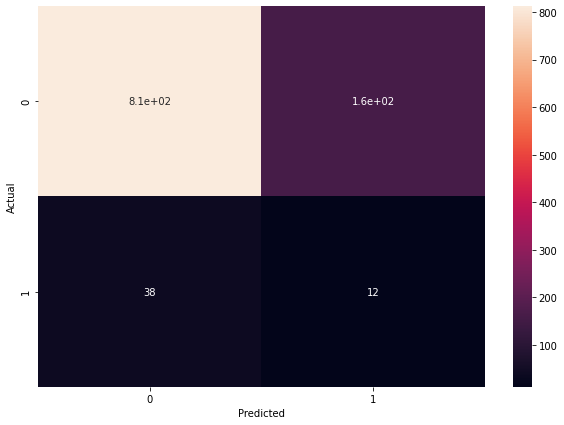

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [99]:
roc_auc_score(y_test,y_pred_rf)

0.5376954732510287

---

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 3 : K Nearest Neighbors KNN

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()

In [102]:
steps_rf = [('Column_Transformation', column_trans),
                ('scaler', StandardScaler(with_mean=True)),
         ('random_forest', rf)]

pipeline_rf = Pipeline(steps_rf)

parameters = {
    #'random_forest__bootstrap': [True, False],
    #'random_forest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'random_forest__max_features': [1, 5, 10, 20],
    #'random_forest__min_samples_leaf': [1, 2, 4],
    #'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    
             }

cv_rf = GridSearchCV(pipeline_rf, param_grid=parameters, cv=5)

In [ ]:
cv_rf.fit(X_train, y_train)


In [92]:
print(cv_rf.best_params_)

{'random_forest__n_estimators': 400}


In [93]:
y_pred_rf = cv_rf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       972
           1       0.07      0.24      0.11        50

    accuracy                           0.81      1022
   macro avg       0.51      0.54      0.50      1022
weighted avg       0.91      0.81      0.85      1022



### RF Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[812, 160],
       [ 38,  12]], dtype=int64)

Text(69.0, 0.5, 'Actual')

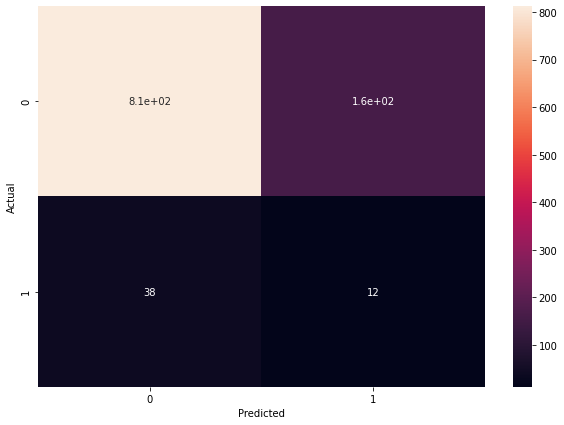

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [99]:
roc_auc_score(y_test,y_pred_rf)

0.5376954732510287

### Junaid's Comments:

So to be explicit, the process would be:

1. Split data into training, validation and test
2. preprocess the data (all splits)
3. If there is a class imbalance, perform up sampling or downsampling (usually via the SMOTE method) on the training data ONLY
4. fit model on training data
5. Perform hyper parameter tuning using the validation set as checks to see if model performance is improving - be careful to avoid overfitting
6. Once you have a final model you’re happy with, compute its adequacy metrics on the test data set

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)